In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', 500)

# 0. Loading our Data

In [3]:
df = pd.read_csv('../Data/donors.csv')

In [4]:
df.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

# 1.Analysing Data

## Donator classification

- RFA_2R    --> Recency code for RFA_2
- RFA_2F    --> Frequency code for RFA_2
- RFA_2A    --> Donation Amount code for RFA_2

In [5]:
columns_donator_classification = [
    'RFA_2R',
    'RFA_2F',
    'RFA_2A'
]

In [34]:
df[columns_donator_classification].head()

,RFA_2R,RFA_2F,RFA_2A
0,L,4,E
1,L,2,G
2,L,4,E
3,L,4,E
4,L,2,F


In [33]:
df[columns_donator_classification].isna().sum()

RFA_2R    0
RFA_2F    0
RFA_2A    0
dtype: int64

In [32]:
df[columns_donator_classification] = df[columns_donator_classification].astype('object')

 ## Donation history

- RAMNTALL  -->  Dollar amount of lifetime gifts to date
- NGIFTALL  -->  Number of lifetime gifts to date
- CARDGIFT  -->  Number of lifetime gifts to card promotions to date
- MINRAMNT  -->  Dollar amount of smallest gift to date
- MINRDATE  -->  Date associated with the smallest gift to date
- MAXRAMNT  -->  Dollar amount of largest gift to date
- MAXRDATE  -->  Date associated with the largest gift to date
- LASTGIFT  -->  Dollar amount of most recent gift
- LASTDATE  -->  Date associated with the most recent gift
- FISTDATE  -->  Date of first gift
- NEXTDATE  -->  Date of second gift
- TIMELAG  -->   Number of months between first and second gift
- AVGGIFT  -->   Average dollar amount of gifts to date

In [8]:
columns_donation_history = [
    'RAMNTALL',
    'NGIFTALL',
    'CARDGIFT',
    'MINRAMNT',
    'MINRDATE',
    'MAXRAMNT',
    'MAXRDATE',
    'LASTGIFT',
    'LASTDATE',
    'FISTDATE',
    'NEXTDATE',
    'TIMELAG',
    'AVGGIFT'
]

In [9]:
df[columns_donation_history].head()

,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT
0,240.0,31,14,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935
1,47.0,3,1,10.0,2013-10-01,25.0,2015-12-01,25.0,2015-12-01,2013-10-01,2015-04-01,18.0,15.666667
2,202.0,27,14,2.0,2011-11-01,16.0,2012-07-01,5.0,2015-12-01,2010-01-01,2011-01-01,12.0,7.481481
3,109.0,16,7,2.0,2007-11-01,11.0,2014-11-01,10.0,2015-12-01,2007-02-01,2007-11-01,9.0,6.812500
4,254.0,37,8,3.0,2013-10-01,15.0,2016-01-01,15.0,2016-01-01,1999-03-01,2000-05-01,14.0,6.864865


In [10]:
df[columns_donation_history].isna().sum()

RAMNTALL       0
NGIFTALL       0
CARDGIFT       0
MINRAMNT       0
MINRDATE       0
MAXRAMNT       0
MAXRDATE       0
LASTGIFT       0
LASTDATE       0
FISTDATE       2
NEXTDATE    9973
TIMELAG     9973
AVGGIFT        0
dtype: int64

In [11]:
#drop rows with FISTDATE == NaN
df.dropna(subset=['FISTDATE'], inplace=True)
df[columns_donation_history].isna().sum()

RAMNTALL       0
NGIFTALL       0
CARDGIFT       0
MINRAMNT       0
MINRDATE       0
MAXRAMNT       0
MAXRDATE       0
LASTGIFT       0
LASTDATE       0
FISTDATE       0
NEXTDATE    9973
TIMELAG     9973
AVGGIFT        0
dtype: int64

In [12]:
#fill time lag between first and second donation to 0
df['TIMELAG'].fillna(0, inplace=True)
df[columns_donation_history].isna().sum()

RAMNTALL       0
NGIFTALL       0
CARDGIFT       0
MINRAMNT       0
MINRDATE       0
MAXRAMNT       0
MAXRDATE       0
LASTGIFT       0
LASTDATE       0
FISTDATE       0
NEXTDATE    9973
TIMELAG        0
AVGGIFT        0
dtype: int64

In [13]:
# Make sure datatype is correct
df[columns_donation_history].dtypes

RAMNTALL    float64
NGIFTALL      int64
CARDGIFT      int64
MINRAMNT    float64
MINRDATE     object
MAXRAMNT    float64
MAXRDATE     object
LASTGIFT    float64
LASTDATE     object
FISTDATE     object
NEXTDATE     object
TIMELAG     float64
AVGGIFT     float64
dtype: object

In [14]:
#fix dtypes
df[columns_donation_history] =\
    df[columns_donation_history].astype(
        {
            'RAMNTALL': 'int64',
            'MINRAMNT': 'int64',
            'MINRDATE': 'datetime64',
            'MAXRAMNT': 'int64',
            'MAXRDATE': 'datetime64',
            'LASTGIFT': 'int64',
            'LASTDATE': 'datetime64',
            'FISTDATE': 'datetime64',
            'NEXTDATE': 'datetime64',
            'TIMELAG': 'int64',
            'AVGGIFT': 'int64'
        }
    )

In [15]:
df[columns_donation_history].head()

,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT
0,240,31,14,5,2012-08-01,12,2014-02-01,10,2015-12-01,2009-11-01,2010-03-01,4,7
1,47,3,1,10,2013-10-01,25,2015-12-01,25,2015-12-01,2013-10-01,2015-04-01,18,15
2,202,27,14,2,2011-11-01,16,2012-07-01,5,2015-12-01,2010-01-01,2011-01-01,12,7
3,109,16,7,2,2007-11-01,11,2014-11-01,10,2015-12-01,2007-02-01,2007-11-01,9,6
4,254,37,8,3,2013-10-01,15,2016-01-01,15,2016-01-01,1999-03-01,2000-05-01,14,6


In [16]:
#generate time delta between biggest and smallest donation
timelag_days = list(map(lambda delta: delta.days, np.abs(df['MINRDATE'] - df['MAXRDATE'])))

new_column = 'TIMEDELTA_SMALLEST_BIGGEST_DONATION'
df[new_column] = timelag_days
columns_donation_history.append(new_column)

In [17]:
#generate time delta between biggest and first donation
timelag_days = list(map(lambda delta: delta.days, np.abs(df['MAXRDATE'] - df['FISTDATE'])))

new_column = 'TIMEDELTA_FIRST_BIGGEST_DONATION'
df[new_column] = timelag_days
columns_donation_history.append(new_column)

In [18]:
#generate time delta between first and last donation
timelag_days = list(map(lambda delta: delta.days, np.abs(df['LASTDATE'] - df['FISTDATE'])))

new_column = 'TIMEDELTA_FIRST_LAST_DONATION'
df[new_column] = timelag_days
columns_donation_history.append(new_column)

In [19]:
columns_to_remove = ['MINRDATE','MAXRDATE','LASTDATE','FISTDATE','NEXTDATE']
df.drop(columns=columns_to_remove, inplace=True)

columns_donation_history = [col for col in columns_donation_history if col not in columns_to_remove]

In [45]:
#Add "Average donation value per gift"'s column
new_column = 'AVG_GIFT_VAL'
columns_donation_history.append(new_column) 

df[new_column] = df['RAMNTALL'] / df['NGIFTALL']
df[new_column].head()

0     7.741935
1    15.666667
2     7.481481
3     6.812500
4     6.864865
Name: AVG_GIFT_VAL, dtype: float64

In [20]:
df[columns_donation_history].head()

,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,TIMEDELTA_SMALLEST_BIGGEST_DONATION,TIMEDELTA_FIRST_BIGGEST_DONATION,TIMEDELTA_FIRST_LAST_DONATION
0,240,31,14,5,12,10,4,7,549,1553,2221
1,47,3,1,10,25,25,18,15,791,791,791
2,202,27,14,2,16,5,12,7,243,912,2160
3,109,16,7,2,11,10,9,6,2557,2830,3225
4,254,37,8,3,15,15,14,6,822,6150,6150


## Merging promotions by year
### Number gifts per year

In [21]:
columns_promotions_2014 = ['RDATE_23','RDATE_24']

columns_promotions_2015 = ['RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18','RDATE_19','RDATE_20','RDATE_21','RDATE_22','RDATE_23','RDATE_24']

columns_promotions_2016 = ['RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8','RDATE_9','RDATE_10','RDATE_11','RDATE_12']

In [22]:
#Getting number of donations per year
nr_donations_2014 = df[columns_promotions_2014].isna().sum(axis=1)
nr_donations_2015 = df[columns_promotions_2015].isna().sum(axis=1)
nr_donations_2016 = df[columns_promotions_2016].isna().sum(axis=1)
donations = pd.DataFrame([nr_donations_2014, nr_donations_2015, nr_donations_2016]).transpose()

columns_nr_donations_perYear = ['TOT_DON_14','TOT_DON_15','TOT_DON_16']

In [23]:
df[columns_nr_donations_perYear] = donations
df[columns_nr_donations_perYear].head()

,TOT_DON_14,TOT_DON_15,TOT_DON_16
0,0,6,9
1,2,11,9
2,0,6,9
3,2,7,8
4,2,11,9


### Total gift amount per year

In [24]:
columns_promotions_2014 = ['RAMNT_23','RAMNT_24']

columns_promotions_2015 = ['RAMNT_13','RAMNT_14','RAMNT_15','RAMNT_16','RAMNT_17','RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22','RAMNT_23','RAMNT_24']

columns_promotions_2016 = ['RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6','RAMNT_7','RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12']

In [25]:
#Getting number of donations per year
nr_donations_2014 = df[columns_promotions_2014].sum(axis=1)
nr_donations_2015 = df[columns_promotions_2015].sum(axis=1)
nr_donations_2016 = df[columns_promotions_2016].sum(axis=1)
donations = pd.DataFrame([nr_donations_2014, nr_donations_2015, nr_donations_2016]).transpose()

columns_total_donation_amount_perYear = ['TOT_DON_AMNT_14','TOT_DON_AMNT_15','TOT_DON_AMNT_16']

In [26]:
df[columns_total_donation_amount_perYear] = donations
df[columns_total_donation_amount_perYear].head()

,TOT_DON_AMNT_14,TOT_DON_AMNT_15,TOT_DON_AMNT_16
0,20.0,63.0,10.0
1,0.0,12.0,25.0
2,13.0,47.0,11.0
3,0.0,45.0,20.0
4,0.0,10.0,15.0


## Adding return rate per donator
- **CARDPROM**  -->   Lifetime number of card promotions received to
                    date. Card promotions are promotion type FS, GK,
                    TK, SK, NK, XK, UF, UU.

- **MAXADATE**  -->   Date of the most recent promotion received (in
                    YYMM, Year/Month format)

- **NUMPROM**   -->   Lifetime number of promotions received to date

- **CARDPM12**  -->   Number of card promotions received in the last
                    12 months (in terms of calendar months translates
                    into 1603-1702)
                    
- **NUMPRM12**  -->   Number of promotions received in the last 12
                    months (in terms of calendar months translates
                    into 1603-1702)

In [42]:
columns_overall_promotion_targeting = [
    'CARDPROM',
    'MAXADATE',
    'NUMPROM',
    'CARDPM12',
    'NUMPRM12',
]

columns_return_rates = []

In [38]:
df[columns_overall_promotion_targeting].head()

,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12
0,27,2017-02-01,74,6,14
1,12,2017-02-01,32,6,13
2,26,2017-02-01,63,6,14
3,27,2017-02-01,66,6,14
4,43,2017-02-01,113,10,25


In [44]:
#Adding conversion rate into df
new_column = 'CONVERSION_RATE'
columns_return_rates.append(new_column)

df[new_column] = df['NGIFTALL'] / df['NUMPROM']
df[new_column].head()

0    0.418919
1    0.093750
2    0.428571
3    0.242424
4    0.327434
Name: CONVERSION_RATE, dtype: float64

In [ ]:
#Adding conversion rate into df
new_column = 'GIFT_AVG_AMNT'
columns_return_rates.append(new_column)

df[new_column] = df['NGIFTALL'] / df['NUMPROM']
df[new_column].head()

In [46]:
#Adding average gift per promotion targeting
new_column = 'GIFT_AVG_AMNT_PER_PROMOTION'
columns_return_rates.append(new_column)

df[new_column] = df['RAMNTALL'] / df['NUMPROM']
df[new_column].head()

0    3.243243
1    1.468750
2    3.206349
3    1.651515
4    2.247788
Name: GIFT_AVG_AMNT_PER_PROMOTION, dtype: float64

## Small Recap

In [47]:
modified_columns =\
    columns_donator_classification +\
    columns_donation_history +\
    columns_nr_donations_perYear +\
    columns_total_donation_amount_perYear +\
    columns_return_rates

df[modified_columns].head()

,RFA_2R,RFA_2F,RFA_2A,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,TIMEDELTA_SMALLEST_BIGGEST_DONATION,TIMEDELTA_FIRST_BIGGEST_DONATION,TIMEDELTA_FIRST_LAST_DONATION,AVG_GIFT_VAL,TOT_DON_14,TOT_DON_15,TOT_DON_16,TOT_DON_AMNT_14,TOT_DON_AMNT_15,TOT_DON_AMNT_16,CONVERSION_RATE,CONVERSION_RATE,GIFT_AVG_AMNT_PER_PROMOTION
0,L,4,E,240,31,14,5,12,10,4,7,549,1553,2221,7.741935,0,6,9,20.0,63.0,10.0,0.418919,0.418919,3.243243
1,L,2,G,47,3,1,10,25,25,18,15,791,791,791,15.666667,2,11,9,0.0,12.0,25.0,0.093750,0.093750,1.468750
2,L,4,E,202,27,14,2,16,5,12,7,243,912,2160,7.481481,0,6,9,13.0,47.0,11.0,0.428571,0.428571,3.206349
3,L,4,E,109,16,7,2,11,10,9,6,2557,2830,3225,6.812500,2,7,8,0.0,45.0,20.0,0.242424,0.242424,1.651515
4,L,2,F,254,37,8,3,15,15,14,6,822,6150,6150,6.864865,2,11,9,0.0,10.0,15.0,0.327434,0.327434,2.247788


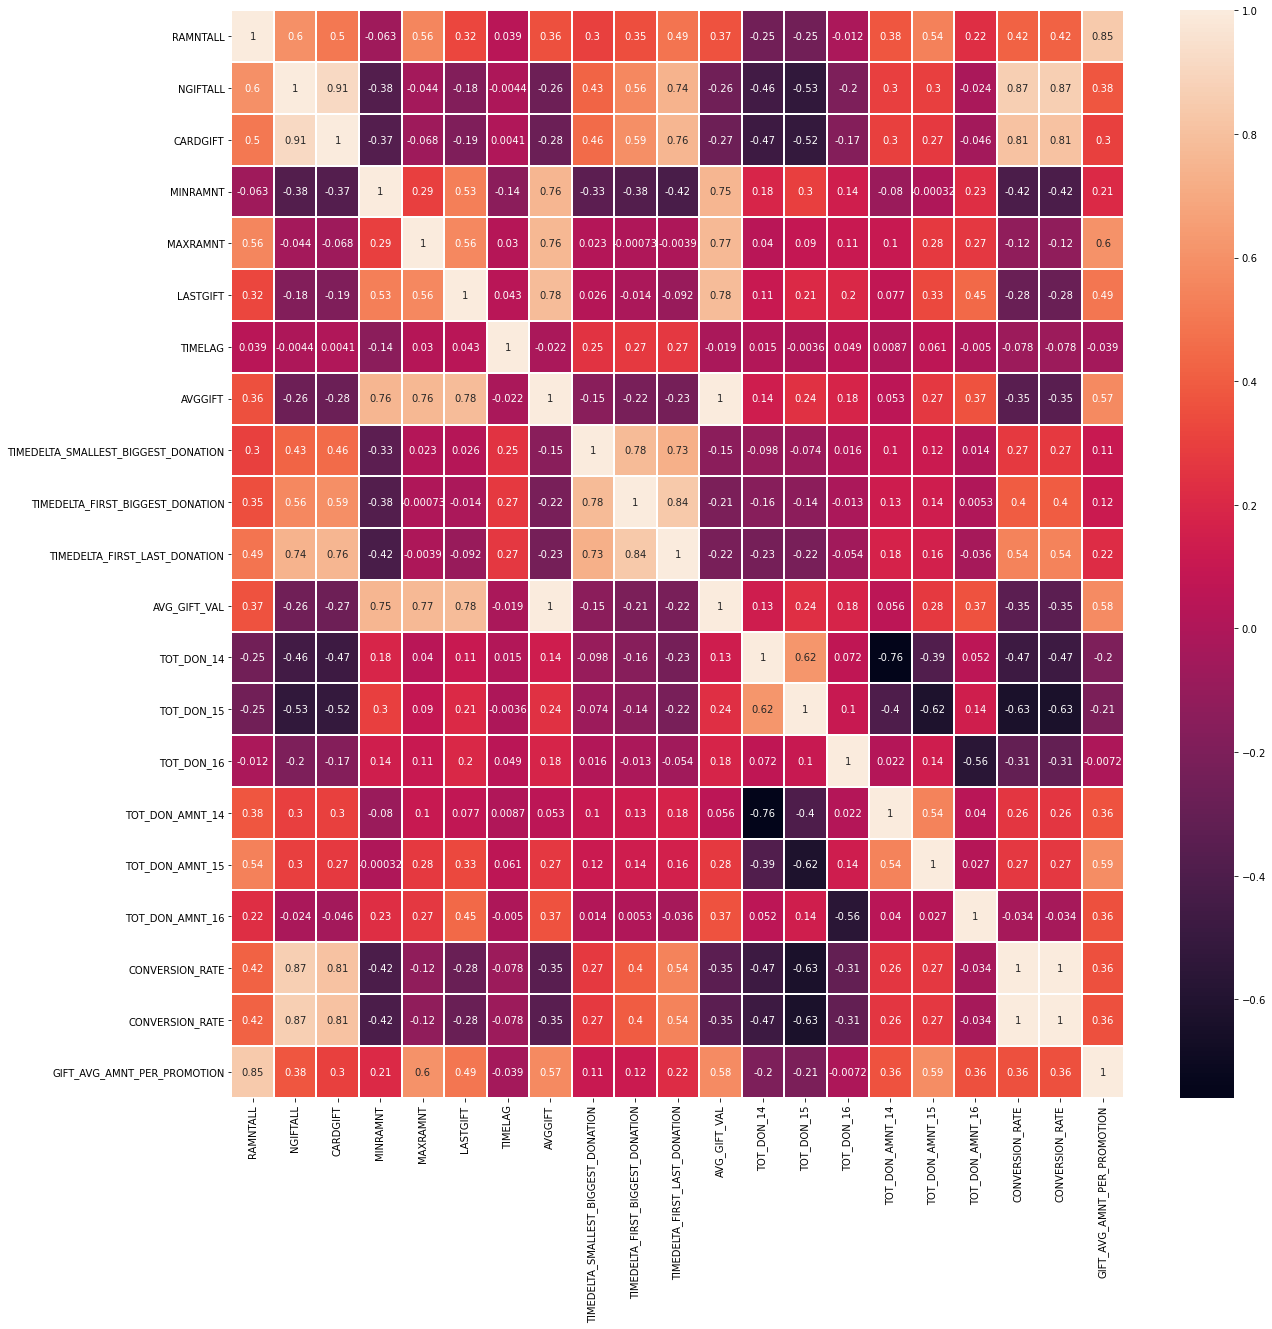

In [52]:
corr = df[modified_columns].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()